In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


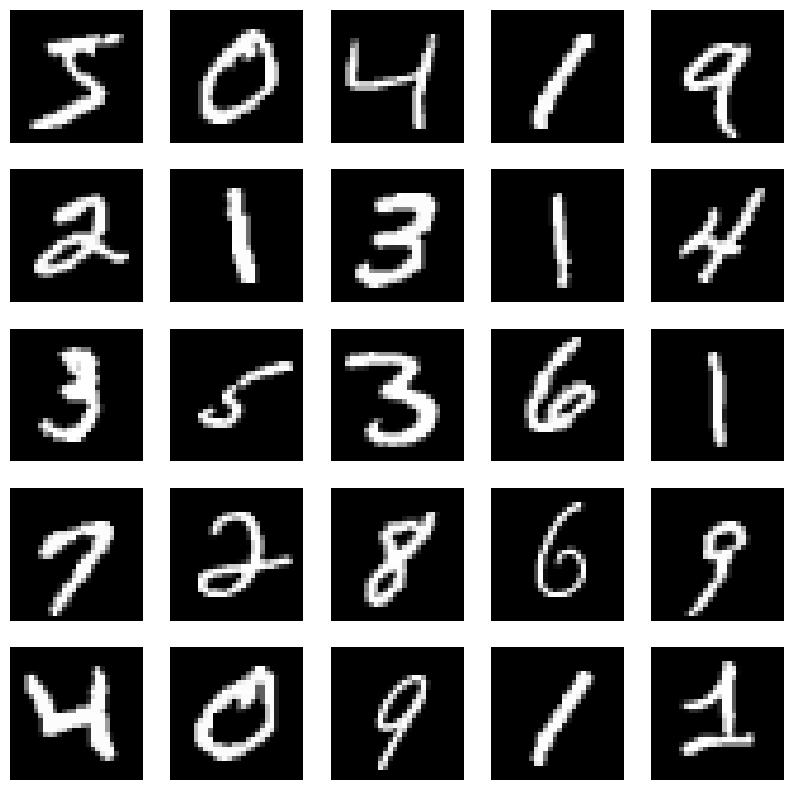

In [4]:
# Display the first 25 training images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
plt.show()

In [5]:
# Create a sequential model
model = models.Sequential()

# Add a flatten layer to convert the input shape to a 1D array
model.add(layers.Flatten(input_shape=(28, 28)))

# Add a dense layer with 128 units and ReLU activation function
model.add(layers.Dense(128, activation='relu'))

# Add another dense layer with 128 units and ReLU activation function
model.add(layers.Dense(128, activation='relu'))

# Add a dense layer with 10 units for classification
model.add(layers.Dense(10))

In [6]:
#Compiles the model with the specified optimizer, loss function, and metrics.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
# Train the model and store the training history
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 2.0483 - accuracy: 0.8678 - val_loss: 0.5171 - val_accuracy: 0.9183
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3948 - accuracy: 0.9271 - val_loss: 0.2965 - val_accuracy: 0.9361
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2385 - accuracy: 0.9424 - val_loss: 0.3350 - val_accuracy: 0.9348
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1891 - accuracy: 0.9513 - val_loss: 0.2185 - val_accuracy: 0.9497
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1516 - accuracy: 0.9578 - val_loss: 0.1706 - val_accuracy: 0.9576
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1322 - accuracy: 0.9629 - val_loss: 0.1595 - val_accuracy: 0.9591
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1214 - accuracy: 0.9661 - val_loss: 0.1601 - val_accuracy:

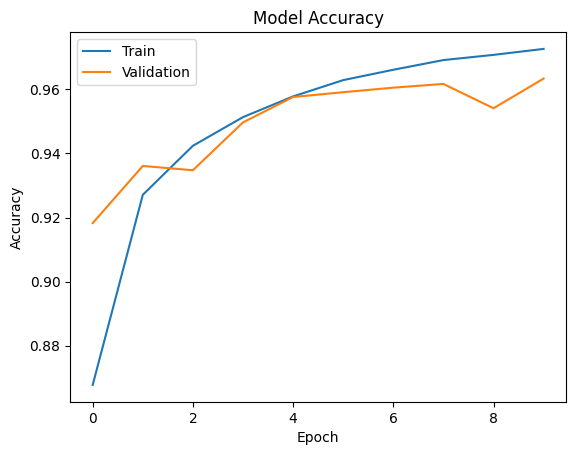

In [8]:
# Plot the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

313/313 - 0s - loss: 0.1597 - accuracy: 0.9631 - 489ms/epoch - 2ms/step
313/313 [==============================] - 0s 1ms/step


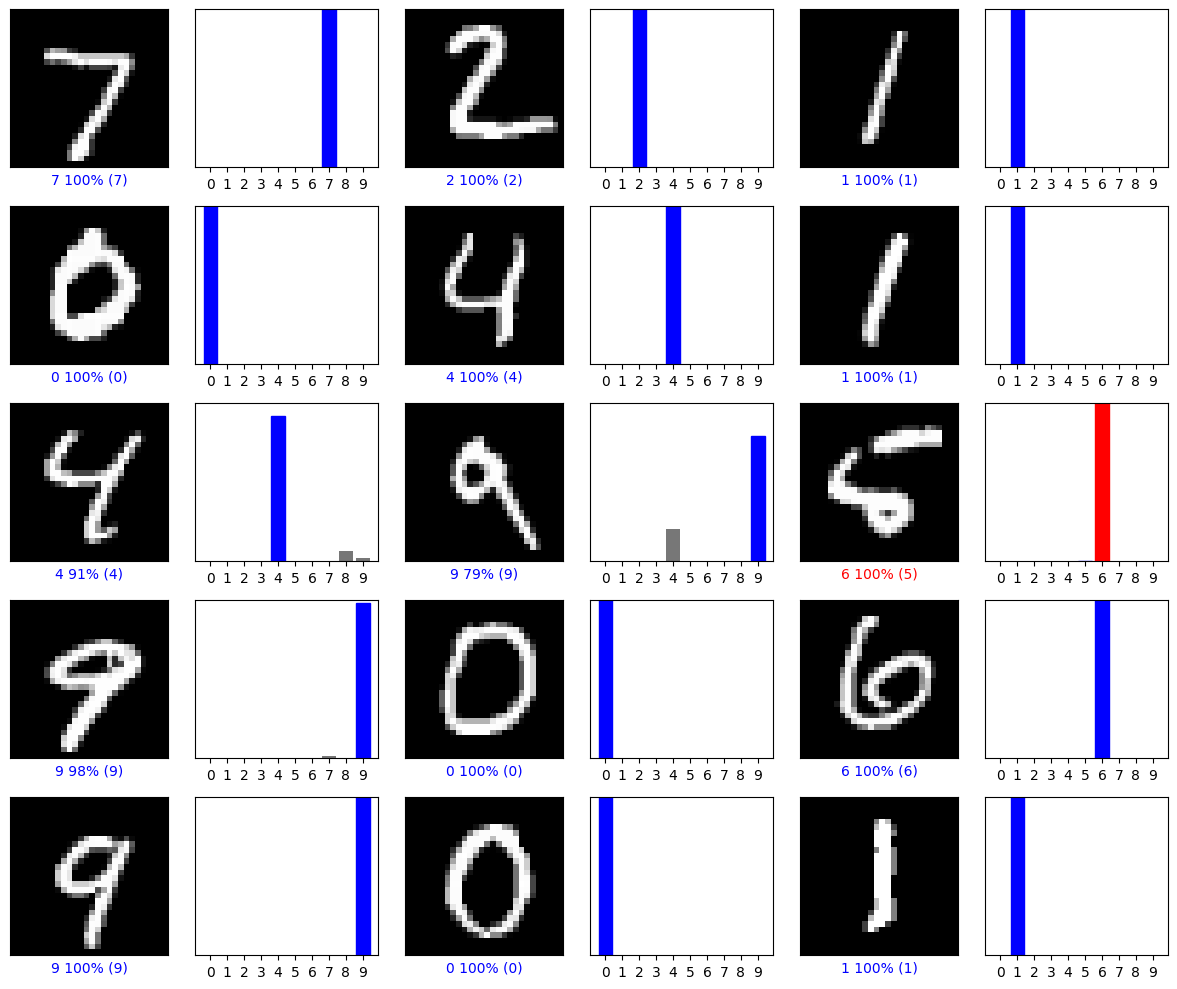

In [9]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

# Make predictions
predictions = model.predict(test_images)

# Make predictions

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

# Verify predictions

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap='gray')

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                        100*np.max(predictions_array),
                                        true_label),
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
# Plot the first X test images, their predicted labels, and the true labels
# Color correct predictions in blue, incorrect predictions in red

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()